In [7]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [8]:
data=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING")

IsADirectoryError: [Errno 21] Is a directory: '/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING'

In [ ]:
data

In [ ]:
time_series = pd.DataFrame(columns=['date','spread'])
# modifiique los nombres así era más claro

#APLICAR EXPONENTE HURST
data["SPREAD_COLOCAR_PLAZO_CERCANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COLOCAR_PLAZO_LEJANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_TOMAR_PLAZO_CERCANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) - data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]
data["SPREAD_TOMAR_PLAZO_LEJANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100) - data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]

threshold_arbitrage=0

for index, row in data_general.iterrows():
    #Elegimos el mejor spread para colocar y tomar
    if  row["SPREAD_COLOCAR_PLAZO_CERCANO"] > row["SPREAD_COLOCAR_PLAZO_LEJANO"]:
         spread_colocar = row["SPREAD_COLOCAR_PLAZO_CERCANO"]
    else:
        spread_colocar = row["SPREAD_COLOCAR_PLAZO_LEJANO"]

    if row["SPREAD_TOMAR_PLAZO_CERCANO"] < row["SPREAD_TOMAR_PLAZO_LEJANO"]:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_CERCANO"]

    else:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_LEJANO"]

    # CASO NO PASA NADA
    if row["SPREAD_COLOCAR_PLAZO_CERCANO"] < threshold_arbitrage and row["SPREAD_COLOCAR_PLAZO_LEJANO"] < threshold_arbitrage  and row["SPREAD_TOMAR_PLAZO_CERCANO"] > threshold_arbitrage and row["SPREAD_TOMAR_PLAZO_LEJANO"] > threshold_arbitrage:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)

    elif spread_colocar > 0 and spread_tomar < 0:

        if spread_colocar > -spread_tomar:
            
            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)
        
        else:

            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)

    elif spread_colocar > 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)

    elif spread_tomar < 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)
    
    else:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)

In [ ]:
lista = []
count = 0
for index, data_point in enumerate(time_series["spread"]):
    if data_point < 0:
        count += 1
        lista.append((index, data_point))

In [ ]:
datos_filtrados=pd.DataFrame(lista)
datos_filtrados["indice_trade"]= datos_filtrados.iloc[:, 0]
datos_filtrados["spread"]= datos_filtrados.iloc[:, 1]
datos_filtrados=datos_filtrados[["indice_trade","spread"]]

# DATOS COMPLETOS

In [3]:
time_series["spread"].plot(figsize=(20,10))

NameError: name 'time_series' is not defined

# DATOS FILTRADOS

<Axes: >

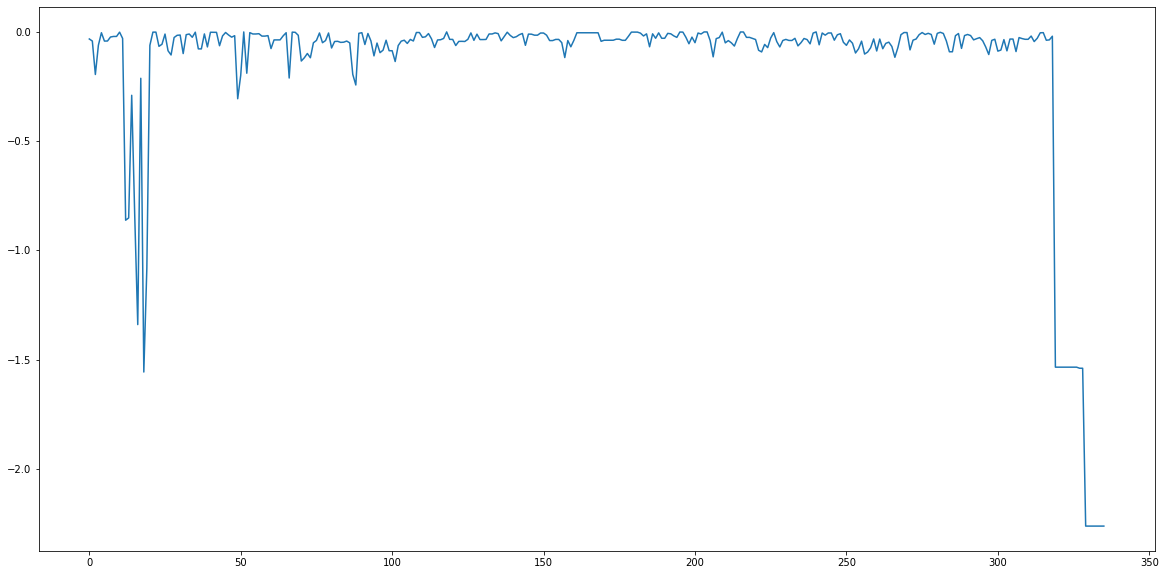

In [48]:
datos_filtrados["spread"].plot(figsize=(20,10))

In [49]:
filtered_df2 = data.loc[datos_filtrados["indice_trade"].values]
filtered_df2.drop(columns="caucion_a_un_dia_ultimo_trade_monto",inplace=True)
filtered_df2.drop(columns="time",inplace=True)

data=filtered_df2

data["SPREAD_COLOCAR_PLAZO_CERCANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COLOCAR_PLAZO_LEJANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_TOMAR_PLAZO_CERCANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)  - data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]
data["SPREAD_TOMAR_PLAZO_LEJANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)  - data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"]

data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO"]=data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] 
data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"]=data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] 

In [50]:
data=data[["SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO","SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO","SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"]]

In [51]:
data

,SPREAD_COLOCAR_PLAZO_CERCANO,SPREAD_COLOCAR_PLAZO_LEJANO,SPREAD_TOMAR_PLAZO_CERCANO,SPREAD_TOMAR_PLAZO_LEJANO,SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO,SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO
233,0.012141,0.021318,-0.032310,-0.023132,-0.009177,0.009178
234,-0.007191,0.030793,-0.041785,-0.003799,-0.037984,0.037987
235,-0.007201,0.174367,-0.194943,-0.003789,-0.181568,0.191154
236,0.002578,0.040521,-0.061089,-0.013569,-0.037942,0.047520
237,-0.007201,-0.093726,0.082741,-0.003789,0.086524,-0.086530
...,...,...,...,...,...,...
5599,2.241843,-0.746559,0.431955,-2.262718,2.988402,-2.694673
5600,2.241843,-0.746559,0.431955,-2.262718,2.988402,-2.694673
5601,2.241843,-0.746559,0.431955,-2.262718,2.988402,-2.694673
5602,2.241843,-0.746559,0.431955,-2.262718,2.988402,-2.694673


In [52]:
len(datos_filtrados["spread"])

336

In [53]:
data

,SPREAD_COLOCAR_PLAZO_CERCANO,SPREAD_COLOCAR_PLAZO_LEJANO,SPREAD_TOMAR_PLAZO_CERCANO,SPREAD_TOMAR_PLAZO_LEJANO,SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO,SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO
233,0.012141,0.021318,-0.032310,-0.023132,-0.009177,0.009178
234,-0.007191,0.030793,-0.041785,-0.003799,-0.037984,0.037987
235,-0.007201,0.174367,-0.194943,-0.003789,-0.181568,0.191154
236,0.002578,0.040521,-0.061089,-0.013569,-0.037942,0.047520
237,-0.007201,-0.093726,0.082741,-0.003789,0.086524,-0.086530
...,...,...,...,...,...,...
5599,2.241843,-0.746559,0.431955,-2.262718,2.988402,-2.694673
5600,2.241843,-0.746559,0.431955,-2.262718,2.988402,-2.694673
5601,2.241843,-0.746559,0.431955,-2.262718,2.988402,-2.694673
5602,2.241843,-0.746559,0.431955,-2.262718,2.988402,-2.694673


In [54]:
X = data
y= datos_filtrados["spread"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R2 score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

R2 score: 0.9826163300332252
Mean Squared Error: 0.0026422539603306364


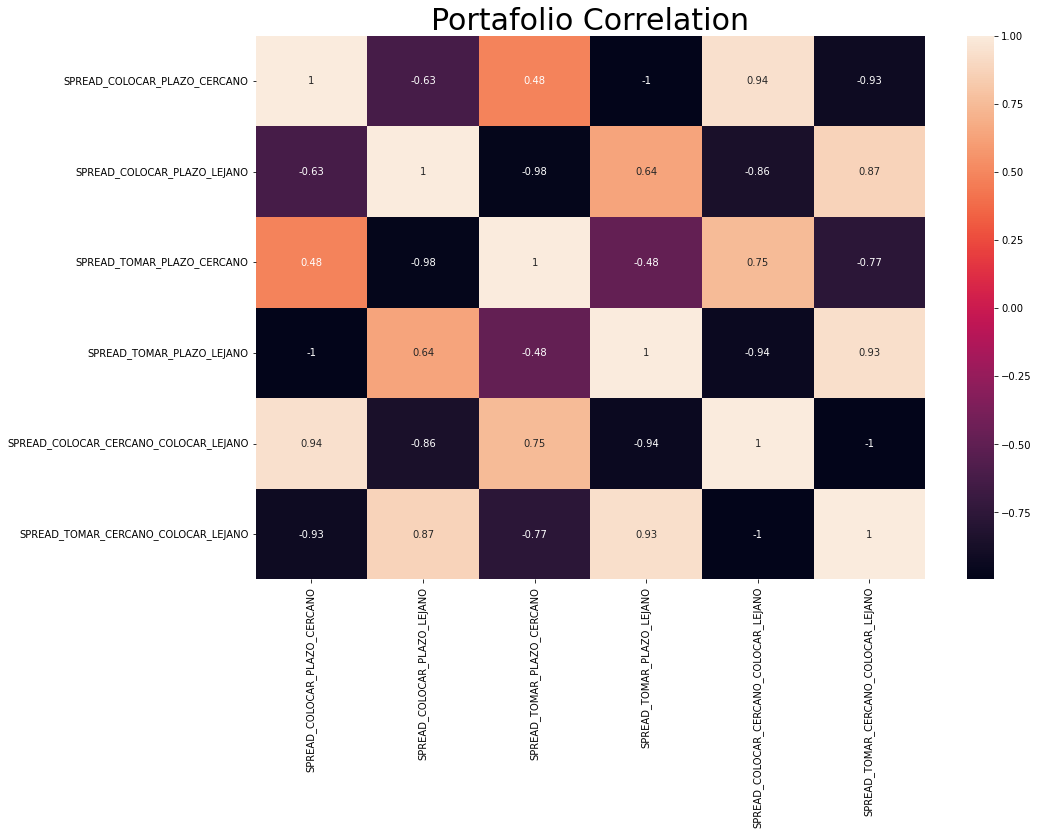

In [56]:
correlation_mat=data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_mat, annot=True)
plt.title("Portafolio Correlation", fontsize=30)
plt.show()

# DIA 1 REGRESION

In [57]:
feature_importance = pd.Series(model.coef_, index=X.columns)
print("Feature importance (coefficients):\n", feature_importance)

Feature importance (coefficients):
 SPREAD_COLOCAR_PLAZO_CERCANO             0.185207
SPREAD_COLOCAR_PLAZO_LEJANO              0.334536
SPREAD_TOMAR_PLAZO_CERCANO               0.659565
SPREAD_TOMAR_PLAZO_LEJANO                0.803449
SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO   -0.149329
SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO      0.143885
dtype: float64


# DIA 2

In [ ]:
- COLOCAR LARGO Y COLOCAR CERCANO

# COMPARACIONES DATOS TOTALES VS DATOS FILTRADOS CON TRADES

In [58]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew,norm
import numpy as np

In [59]:
data=pd.read_csv("/Users/rogarciag/Desktop/AI_&_TRADING/ALGORITHMIC_TRADING/PRINCIPAL/NASINI/TRABAJOS_GENERAL/ANALISIS_DATOS/BASES_DE_DATOS/AL30_COMPLETE_TASAS.csv")

In [60]:
data["SPREAD_COLOCAR_PLAZO_CERCANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)
data["SPREAD_COLOCAR_PLAZO_LEJANO"] = data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] - (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)

data["SPREAD_TOMAR_PLAZO_CERCANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)  - data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]
data["SPREAD_TOMAR_PLAZO_LEJANO"] = (data["caucion_a_un_dia_ultimo_trade_tasa"] / 100)  - data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] 

data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO"]=data["COLOCAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-data["COLOCAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] 
data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"]=data["TOMAR_TASA_ABRIENDO_PLAZO_CERCANO_TASA"]-data["TOMAR_TASA_ABRIENDO_PLAZO_LEJANO_TASA"] 

data_general=data[["caucion_a_un_dia_ultimo_trade_tasa","SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO"]]

threshold_arbitrage=0

for index, row in data_general.iterrows():
    #Elegimos el mejor spread para colocar y tomar
    if  row["SPREAD_COLOCAR_PLAZO_CERCANO"] > row["SPREAD_COLOCAR_PLAZO_LEJANO"]:
         spread_colocar = row["SPREAD_COLOCAR_PLAZO_CERCANO"]
    else:
        spread_colocar = row["SPREAD_COLOCAR_PLAZO_LEJANO"]

    if row["SPREAD_TOMAR_PLAZO_CERCANO"] < row["SPREAD_TOMAR_PLAZO_LEJANO"]:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_CERCANO"]

    else:
        spread_tomar = row["SPREAD_TOMAR_PLAZO_LEJANO"]

    # CASO NO PASA NADA
    if row["SPREAD_COLOCAR_PLAZO_CERCANO"] < threshold_arbitrage and row["SPREAD_COLOCAR_PLAZO_LEJANO"] < threshold_arbitrage  and row["SPREAD_TOMAR_PLAZO_CERCANO"] > threshold_arbitrage and row["SPREAD_TOMAR_PLAZO_LEJANO"] > threshold_arbitrage:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)

    elif spread_colocar > 0 and spread_tomar < 0:

        if spread_colocar > -spread_tomar:
            
            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)
        
        else:

            time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)

    elif spread_colocar > 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_colocar]})],ignore_index=True)

    elif spread_tomar < 0:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[spread_tomar]})],ignore_index=True)
    
    else:

        time_series = pd.concat([time_series, pd.DataFrame({'date':[index],'spread':[0]})],ignore_index=True)

In [61]:
data=data[["SPREAD_COLOCAR_PLAZO_CERCANO","SPREAD_COLOCAR_PLAZO_LEJANO","SPREAD_TOMAR_PLAZO_CERCANO","SPREAD_TOMAR_PLAZO_LEJANO","SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO","SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"]]

In [62]:
data["SPREAD_TRADING"]=time_series["spread"]

In [63]:
rolling_mean = data.rolling(60).mean()
rolling_var = data.rolling(60).var()
rolling_mean.dropna(inplace=True)
rolling_var.dropna(inplace=True)

<Axes: >

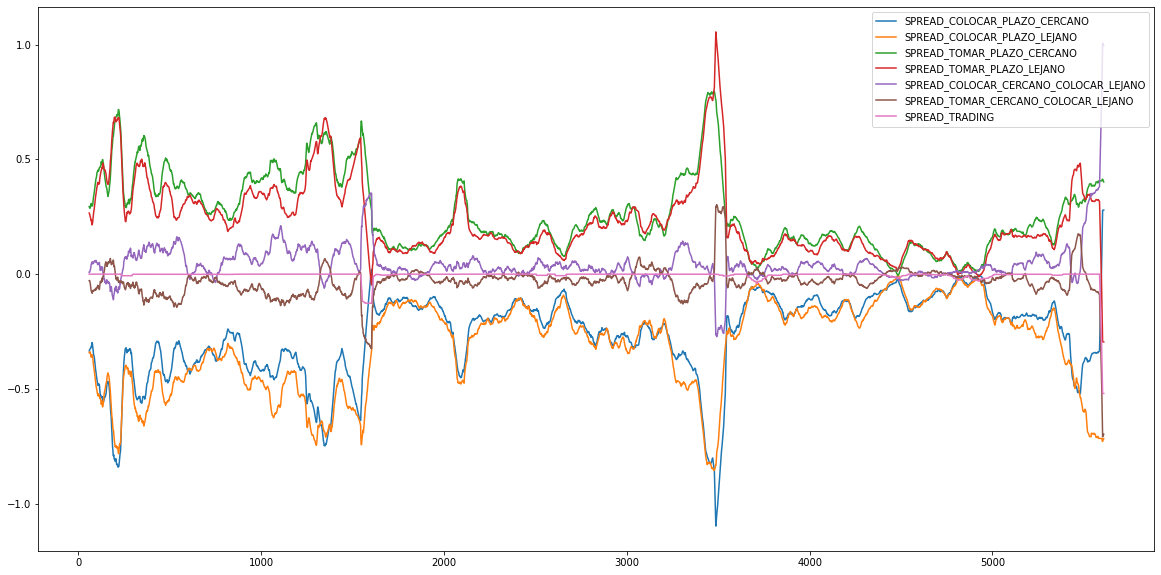

In [64]:
rolling_mean.plot(figsize=(20,10))

<Axes: >

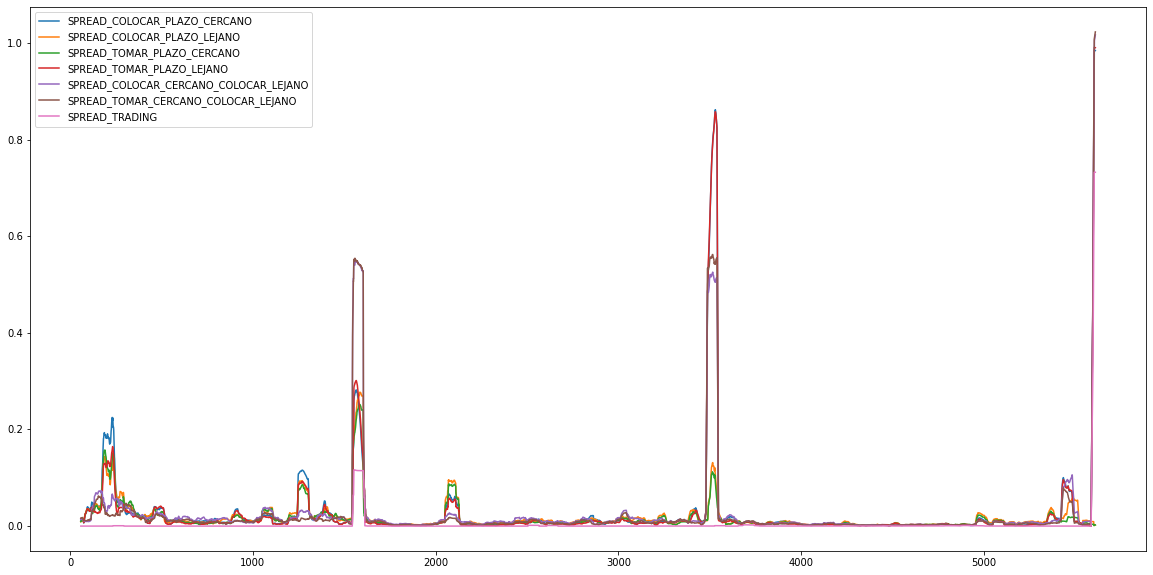

In [65]:
rolling_var.plot(figsize=(20,10))

# LA IDEA ES QUE MEDIANTE FILTROS ESTE NUMERO VAYA DISMINUYENDO Y QUE EL NUMERO DE TRADES SE MANTENGA

In [66]:
num_zeros = (data["SPREAD_TRADING"]== 0).sum()
print("Numero de ceros ':", num_zeros)

numero_trades = (data["SPREAD_TRADING"]<0).sum()
print("Numero de trades ':", numero_trades)

Numero de ceros ': 5274
Numero de trades ': 336


# EXPERIMENTACION PRIMERO EMPEZAMOS CON LO QUE CREEMOS QUE NO FUNCIONA

In [67]:
data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO_MEDIA"]=data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO"].rolling(60).mean()
data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO_MEDIA"]=data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"].rolling(60).mean()

# PRIMEROS CASOS

In [68]:
filtracion = data[(data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO"] > data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO_MEDIA"]) & (data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"] > data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO_MEDIA"])]

In [69]:
num_zeros = (filtracion["SPREAD_TRADING"]== 0).sum()
print("Numero de ceros ':", num_zeros)

numero_trades = (filtracion["SPREAD_TRADING"]<0).sum()
print("Numero de trades ':", numero_trades)

Numero de ceros ': 383
Numero de trades ': 7


In [70]:
filtracion = data[(data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO"] < data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO_MEDIA"]) & (data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"] < data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO_MEDIA"])]

In [71]:
num_zeros = (filtracion["SPREAD_TRADING"]== 0).sum()
print("Numero de ceros ':", num_zeros)

numero_trades = (filtracion["SPREAD_TRADING"]<0).sum()
print("Numero de trades ':", numero_trades)

Numero de ceros ': 386
Numero de trades ': 9


In [72]:
data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO_VAR"]=data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO"].rolling(60).std()
data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO_VAR"]=data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"].rolling(60).std()

In [73]:
filtracion = data[(data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO"] > data["SPREAD_COLOCAR_CERCANO_COLOCAR_LEJANO_MEDIA"]) & (data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO"] > data["SPREAD_TOMAR_CERCANO_COLOCAR_LEJANO_MEDIA"])]